In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [30]:
data=pd.read_csv("Mall_Customers.csv")

In [32]:
numeric_columns=data.select_dtypes(include=[np.number]).columns
non_numeric_columns=data.select_dtypes(exclude=[np.number]).columns

In [34]:
data[numeric_columns]=data[numeric_columns].fillna(data[numeric_columns].mean())

In [36]:
label_encoder=LabelEncoder()
for column in non_numeric_columns:
    data[column]=label_encoder.fit_transform(data[column].astype(str))

In [44]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
features = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
x = data[features]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    sse.append(kmeans.inertia_)


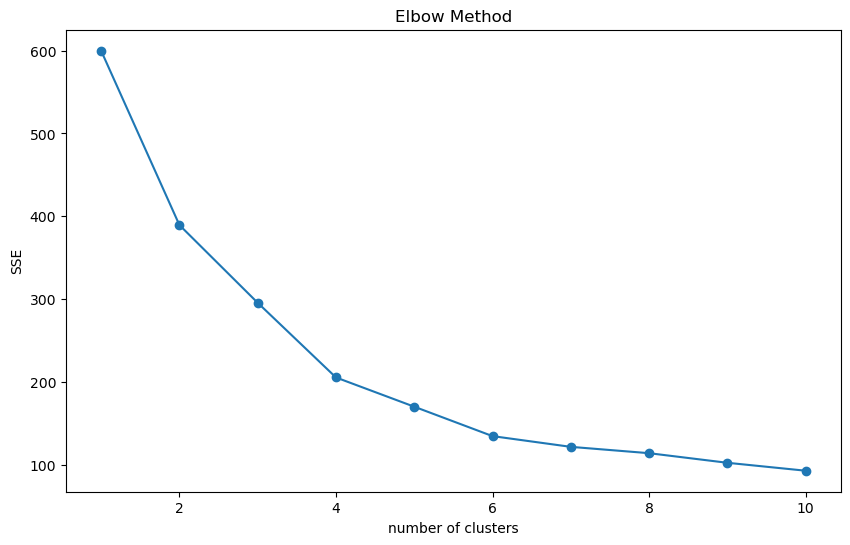

In [46]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),sse,marker='o')
plt.xlabel("number of clusters")
plt.ylabel("SSE")
plt.title("Elbow Method")
plt.show()

In [50]:
silhouette_scores=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(x_scaled)
    silhouette_scores.append(silhouette_score(x_scaled,kmeans.labels_))

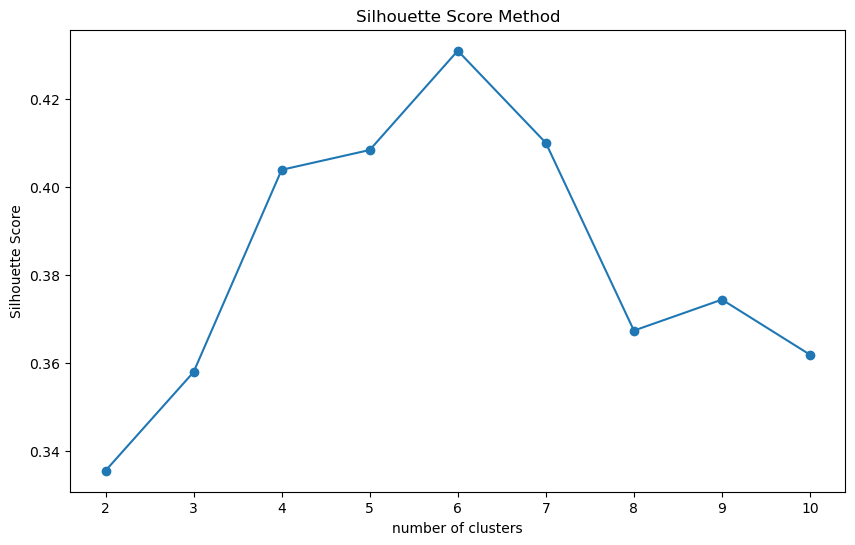

In [52]:
plt.figure(figsize=(10,6))
plt.plot(range(2,11),silhouette_scores,marker="o")
plt.xlabel("number of clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Method")
plt.show()

In [54]:
optimal_k=5
kmeans=KMeans(n_clusters=optimal_k,random_state=42)
data["cluster"]=kmeans.fit_predict(x_scaled)

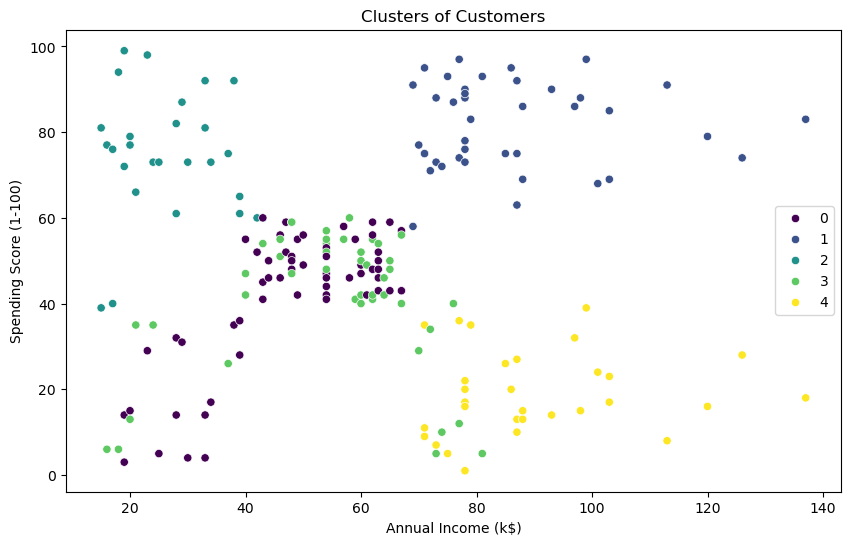

In [60]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="cluster",
    palette="viridis"
)
plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()


In [64]:
cluster_centers=scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df=pd.DataFrame(cluster_centers,columns=features)
cluster_centers_df["cluster"]=range(optimal_k)

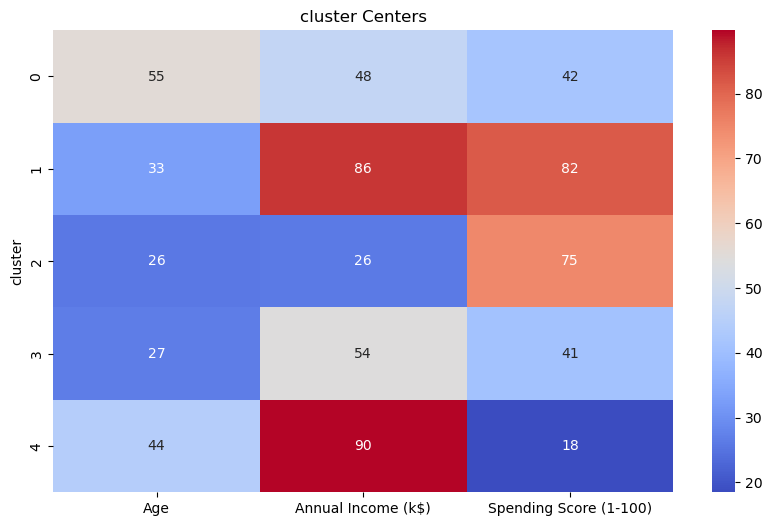

In [70]:
plt.figure(figsize=(10,6))
sns.heatmap(cluster_centers_df.set_index("cluster"),annot=True,cmap="coolwarm")
plt.title("cluster Centers")
plt.show()

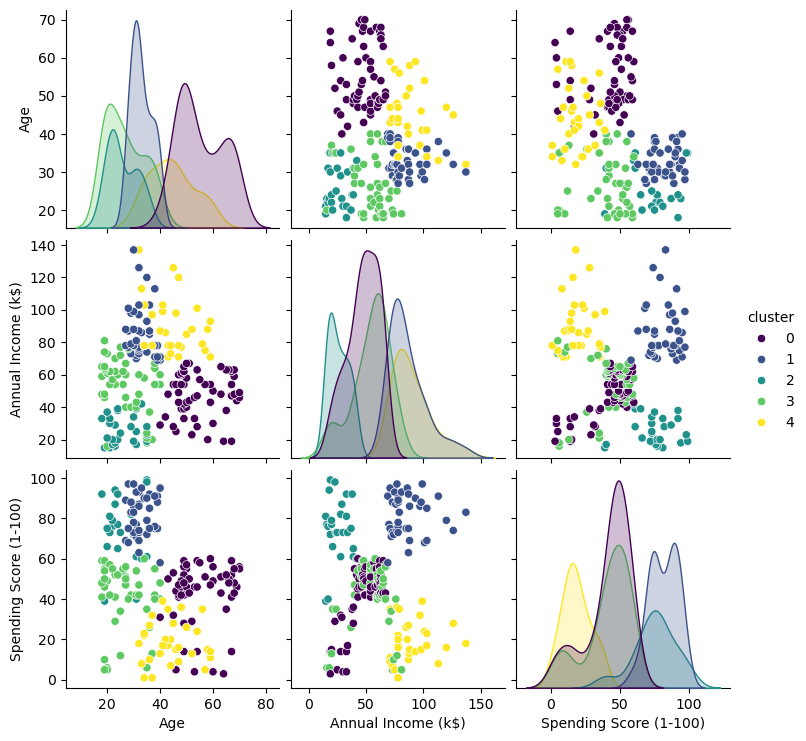

In [72]:
sns.pairplot(data,hue="cluster",palette="viridis",vars=features)
plt.show()

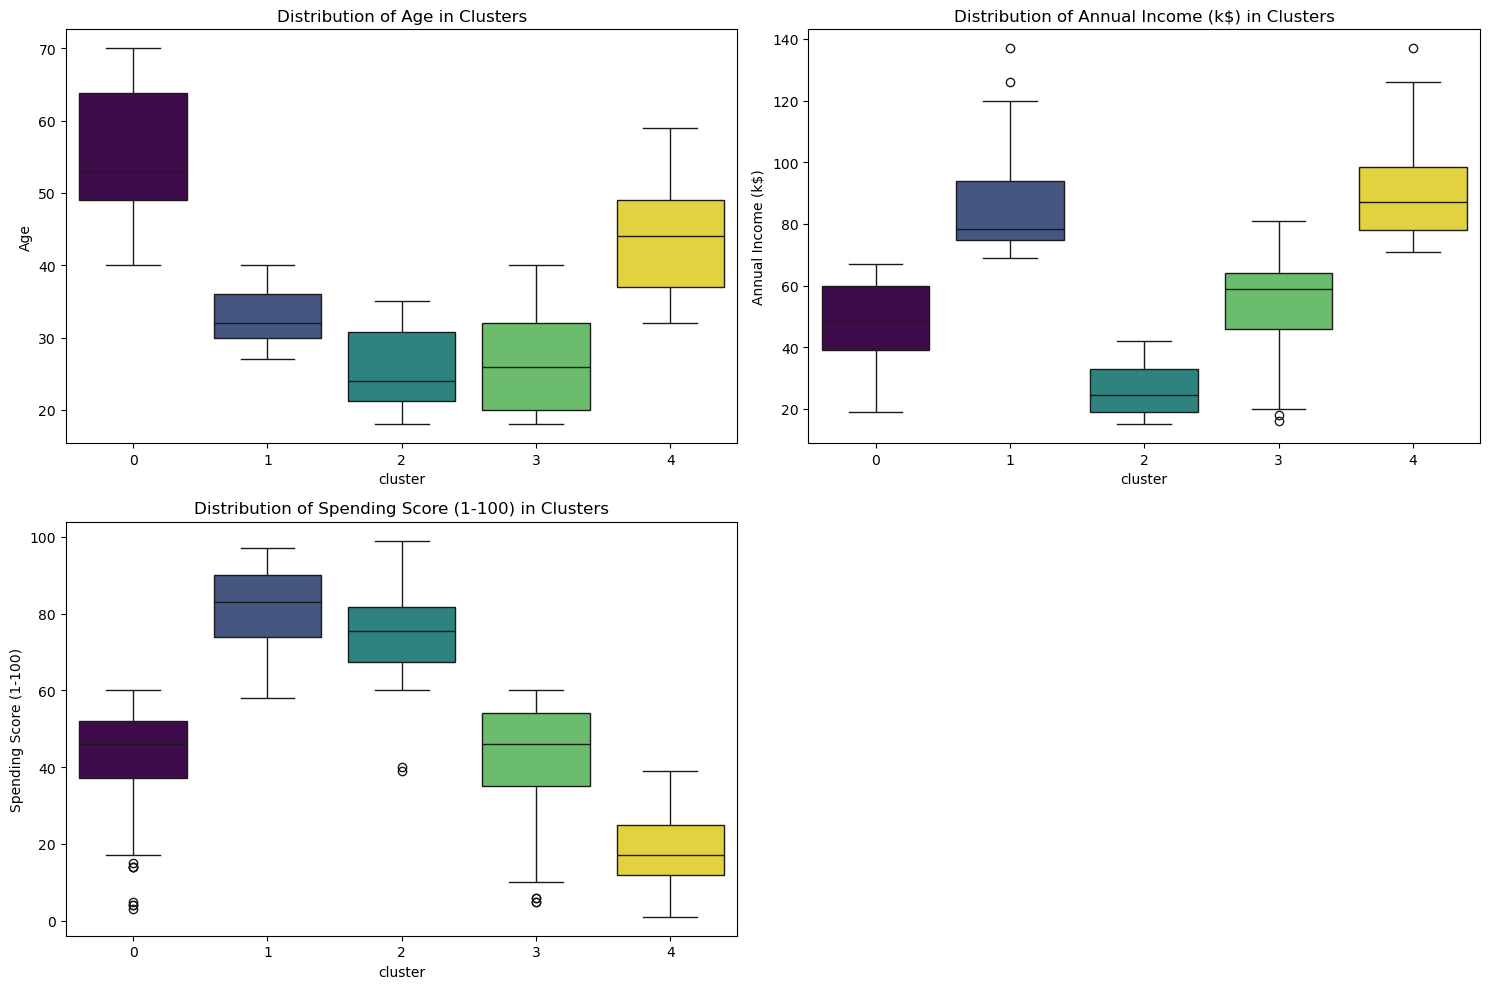

In [78]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x="cluster", y=feature, data=data, hue="cluster", palette="viridis", legend=False)
    plt.title(f"Distribution of {feature} in Clusters")
plt.tight_layout()
plt.show()


In [82]:
cluster_summary=data.groupby("cluster")[features].mean().reset_index()
print(cluster_summary)
data.to_csv("clusteres_customers.csv",index=False)

   cluster        Age  Annual Income (k$)  Spending Score (1-100)
0        0  55.275862           47.620690               41.706897
1        1  32.875000           86.100000               81.525000
2        2  25.769231           26.115385               74.846154
3        3  26.733333           54.311111               40.911111
4        4  44.387097           89.774194               18.483871
